In [128]:
import xml.etree.ElementTree as ET
import html2text,re,csv

content = ''
with open ('./JURIST_Commentary_2000_2020/2015.xml','r+', encoding='utf-8') as fp:
    content = fp.read()
fp.close()

In [129]:
all_commentary_result = []
escape_illegal_xml_characters = lambda x: re.sub(u'[\x00-\x08\x0b\x0c\x0e-\x1F\uD800-\uDFFF\uFFFE\uFFFF]', '', x)
parser = ET.XMLParser(encoding="utf-8")
root = ET.fromstring(escape_illegal_xml_characters(content), parser=parser)
count = 0

In [130]:
while root[0][count].tag != 'item':
    count += 1
assert root[0][-1].tag == 'item'
for item in root[0][count:]:
    tags = []
    affiliation = ''
    author = ''
    contentEncoded = ''
    for child in item:
        if child.tag == 'title':
            title = child.text
        elif child.tag == '{http://purl.org/rss/1.0/modules/content/}encoded':
            contentEncoded = child.text
        elif child.tag == 'link':
            link = child.text
        elif child.tag == 'pubDate':
            date = child.text
        elif child.tag == 'category':
            if child.text != 'Uncategorized' and 'affiliation' not in child.text.lower() and 'author' not in child.text.lower():
                tags.append(child.text)
            elif 'affiliation:' in child.text.lower():
                affiliation = re.sub("affiliation:", "", child.text, flags=re.I)
            elif 'author:' in child.text.lower():
                author = re.sub("author:", "", child.text, flags=re.I)
                
        #else:
            #print(child.tag)
    all_tags = ', '.join(tags)
    #print(contentEncoded)
    result = [title,date,all_tags,author,affiliation,link,contentEncoded]
    all_commentary_result.append(result)


In [131]:
#all_commentary_result[0]


In [132]:
#with open ('2015_commentary_summary.csv','w+') as commentary_csv:
#    writer = csv.writer(commentary_csv)
#    writer.writerow(['Title','Datetime','Tags', 'Author', 'Affiliation','Link'])
#    writer.writerows(all_commentary_result)
#commentary_csv.close()

In [133]:
#ALTERNATIVE METHOD THIS DOES EVERYTHING

In [2]:
import xml.etree.ElementTree as ET
import html2text
from pprint import pprint
import json, os, csv, re

escape_illegal_xml_characters = lambda x: re.sub(u'[\x00-\x08\x0b\x0c\x0e-\x1F\uD800-\uDFFF\uFFFE\uFFFF]', '', x)
all_news = []
all_commentary = []
for root, dirs, files in os.walk("."):
    for name in files:
        if '.xml' in name:
            if "News" in root:
                all_news.append(os.path.join(root, name))
            if "Commentary" in root:
                all_commentary.append(os.path.join(root, name))

In [3]:
def commentary_parsing(root):
    count = 0
    while root[0][count].tag != 'item':
        count += 1
    assert root[0][-1].tag == 'item'
    for item in root[0][count:]:
        tags = []
        affiliation = ''
        author = ''
        contentEncoded = ''
        for child in item:
            if child.tag == 'title':
                title = child.text
            elif child.tag == 'link':
                link = child.text
            elif child.tag == '{http://purl.org/rss/1.0/modules/content/}encoded':
                contentEncoded = child.text
            elif child.tag == 'pubDate':
                date = child.text
            elif child.tag == 'category':
                if child.text != 'Uncategorized' and 'affiliation' not in child.text.lower() and 'author' not in child.text.lower():
                    tags.append(child.text)
                elif 'affiliation:' in child.text.lower():
                    affiliation = re.sub("affiliation:", "", child.text, flags=re.I)
                elif 'author:' in child.text.lower():
                    author = re.sub("author:", "", child.text, flags=re.I)
        all_tags = ', '.join(tags)
        result = [title,date,all_tags,author,affiliation,link,contentEncoded]
        all_commentary_result.append(result)

In [4]:
all_commentary_result = []
for i in all_commentary:
    try:
        root = ET.parse(i).getroot()
        commentary_parsing(root)
    except:
        content = ''
        with open (i,'r+', encoding='utf-8') as fp:
            content = fp.read()
        fp.close()
        parser = ET.XMLParser(encoding="utf-8")
        root = ET.fromstring(escape_illegal_xml_characters(content), parser=parser)
        commentary_parsing(root)
        continue

In [5]:
len(all_commentary_result)

3384

In [6]:
all_news

['./JURIST_News_2003_2020/Apr_2005.xml',
 './JURIST_News_2003_2020/Apr_2006.xml',
 './JURIST_News_2003_2020/Apr_2007.xml',
 './JURIST_News_2003_2020/Apr_2008.xml',
 './JURIST_News_2003_2020/Apr_2009.xml',
 './JURIST_News_2003_2020/Apr_2010.xml',
 './JURIST_News_2003_2020/April_2020.xml',
 './JURIST_News_2003_2020/Aug_2005.xml',
 './JURIST_News_2003_2020/Aug_2006.xml',
 './JURIST_News_2003_2020/Aug_2007.xml',
 './JURIST_News_2003_2020/Aug_2008.xml',
 './JURIST_News_2003_2020/Aug_2009.xml',
 './JURIST_News_2003_2020/Aug_2010.xml',
 './JURIST_News_2003_2020/Dec_2005.xml',
 './JURIST_News_2003_2020/Dec_2006.xml',
 './JURIST_News_2003_2020/Dec_2007.xml',
 './JURIST_News_2003_2020/Dec_2008.xml',
 './JURIST_News_2003_2020/Dec_2009.xml',
 './JURIST_News_2003_2020/Dec_2010.xml',
 './JURIST_News_2003_2020/Feb_2005.xml',
 './JURIST_News_2003_2020/Feb_2006.xml',
 './JURIST_News_2003_2020/Feb_2007.xml',
 './JURIST_News_2003_2020/Feb_2008.xml',
 './JURIST_News_2003_2020/Feb_2009.xml',
 './JURIST_New

In [7]:
def news_parsing(root):
    count = 0
    while root[0][count].tag != 'item':
        count += 1
    assert root[0][-1].tag == 'item'
    for item in root[0][count:]:
        tags = []
        affiliation = ''
        author = ''
        contentEncoded = ''
        for child in item:
            if child.tag == 'title':
                title = child.text
            elif child.tag == 'link':
                link = child.text
            elif child.tag == '{http://purl.org/rss/1.0/modules/content/}encoded':
                contentEncoded = child.text
            elif child.tag == 'pubDate':
                date = child.text
            elif child.tag == 'category':
                if child.text != 'Uncategorized' and 'affiliation' not in child.text.lower() and 'author' not in child.text.lower():
                    tags.append(child.text)
                elif 'affiliation:' in child.text.lower():
                    affiliation = re.sub("affiliation:", "", child.text, flags=re.I)
                elif 'author:' in child.text.lower():
                    author = re.sub("author:", "", child.text, flags=re.I)
        all_tags = ', '.join(tags)
        result = [title,date,all_tags,author,affiliation,link,contentEncoded]
        all_news_result.append(result)

In [8]:
all_news_result = []
for i in all_news:
    try:
        root = ET.parse(i).getroot()
        news_parsing(root)
    except:
        content = ''
        with open (i,'r+', encoding='utf-8') as fp:
            content = fp.read()
        fp.close()
        parser = ET.XMLParser(encoding="utf-8")
        root = ET.fromstring(escape_illegal_xml_characters(content), parser=parser)
        news_parsing(root)
        continue

In [9]:
all_news_result[2002][6]

'<p>[JURIST] Former <a href="/currentawareness/guantanamo.php">Guantanamo Bay</a> [JURIST news archive] detainee <a href="http://projecthamad.org/">Adel Hassan Hamad</a> [advocacy website] filed <a href="/pdf/HamadComplaintApr82010.pdf">suit</a> [complaint, PDF] in the <a href="http://www.wawd.uscourts.gov/">US District Court for the Western District of Washington</a> [official website] Wednesday against the US government and more than a dozen government officials. Hamad, a Sudanese aid worker captured in Pakistan in 2002, claims he was tortured during his time at Guantanamo Bay. A lawyer for Hamad claimed in 2007 that he was <a href="/forumy/2007/01/representing-adel-case-of-guantanamo.php">not guilty of any crimes</a> [JURIST op-ed] and that the government had obstructed lawyers&#39; attempts to clear his name. It is unclear how much compensation Hamad is seeking.<br /><br />Hamad was among a group of former detainees who <a href="/paperchase/2008/01/ex-guantanamo-prisoners-in-sudan-

In [10]:
import nltk

In [153]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/imadrizvi/nltk_data...


True

In [11]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [12]:
sid = SentimentIntensityAnalyzer()

In [13]:
sid.polarity_scores("bad")





{'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound': -0.5423}

In [14]:
from flair.models import TextClassifier
from flair.data import Sentence

In [180]:
flair_sentiment = TextClassifier.load('en-sentiment')


 14%|█▍        | 37808128/266170364 [00:28<02:19, 1636394.95B/s]


 32%|███▏      | 83909632/266170364 [00:58<01:23, 2181656.68B/s]


 50%|█████     | 133735424/266170364 [01:25<00:50, 2619076.60B/s]


 70%|███████   | 186852352/266170364 [01:51<00:53, 1480672.95B/s]


 91%|█████████ | 241459200/266170364 [02:18<00:11, 2109726.17B/s]


100%|██████████| 266170364/266170364 [02:33<00:00, 1732157.96B/s]

In [41]:
#all_commentary_result[1][6]

In [16]:
all_news_result[6]


['Berger pleads guilty to taking classified documents, loses security clearance',
 'Sat, 02 Apr 2005 01:49:00 +0000',
 'Terrorism, us',
 '',
 '',
 'https://www.jurist.org/news/2005/04/berger-pleads-guilty-to-taking/',
 '<p>As <a href="/paperchase/2005_03_31_indexarch.php#111232280482341395">anticipated</a> [JURIST report], <a href="http://en.wikipedia.org/wiki/Sandy_Berger">former US National Security Advisor Sandy Berger</a> [Wikipedia profile] pleaded guilty Friday to illegally taking and destroying classified documents from the <a href="http://www.archives.gov/">National Archives</a> [official website]. The former Clinton Administration official acknowledged that he intentionally took and deliberately destroyed three copies of the same document dealing with terror threats during the 2000 millennium celebration and then lied about it to Archives staff when they told him documents were missing. As part of his sentencing agreement, Berger surrendered his security clearance and agreed t

In [17]:
processedNews = all_news_result
processedCommentary = all_commentary_result
    

In [18]:
count = 0
for i in processedCommentary:
    count=count+1
    i[6] = re.sub("\s+"," ",re.sub('<p>|</p>|\n|</a>|<a.*?>|<br />|&.*?;|<em>|</em>|<.*?>',' ',str(i[6])))
    

In [19]:
count = 0
for i in processedNews:
    count=count+1
    i[6] = re.sub("\s+"," ",re.sub('<p>|</p>|\n|</a>|<a.*?>|<br />|&.*?;|<em>|</em>|<.*?>|\[.*?\]',' ',str(i[6])))
    

In [20]:
#processedNews[25000][6]

In [21]:
processedNews[31][2]

'Lebanon, Middle East, Syria, un'

In [22]:
import pandas as pd

In [23]:
df = pd.DataFrame.from_records(processedCommentary)

In [40]:
#df.iloc[134][6]

In [25]:
df['isUSA'] = df[2].str.contains('United States')
df['isME'] = df[2].str.contains('Middle East')
vaderScores = [None] * len(df)

In [26]:
#df['VADER'] = sid.polarity_scores(df[2])
count = 0
for i in range(len(df)):
    count=count+1
    vaderScores[i] = sid.polarity_scores(df[6][i])
count

3384

In [27]:
df['VaderScores'] = vaderScores

In [28]:
numGreater = sum(i['compound'] < .8 and i['compound'] > -.8 for i in vaderScores)

In [30]:
numGreater/len(df)
#For some reason,  the scores seem really polar -- it seems that 90% of the results fall between -.8 to -1 or .8 to 1

0.10815602836879433

In [54]:
#Need to get data for a histogram
USVader = df[df['isUSA'] == True]['VaderScores']
MEVader = df[df['isME'] == True]['VaderScores']

In [52]:
USVaderList = [None] * len(USVader)
MEVaderList = [None] * len(MEVader)

In [56]:
for i in range(len(USVaderList)):
    USVaderList[i] = USVader.iloc[i]['compound']
for i in range(len(MEVaderList)):
    MEVaderList[i] = MEVader.iloc[i]['compound']

In [33]:
from matplotlib import pyplot

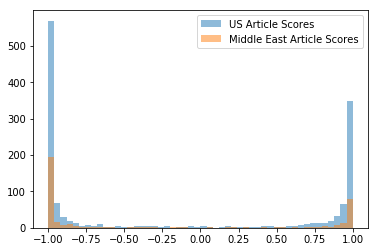

In [63]:
pyplot.hist(USVaderList, 50, alpha=0.5, label='US Article Scores')
pyplot.hist(MEVaderList, 50, alpha=0.5, label='Middle East Article Scores')
pyplot.legend(loc='upper right')
pyplot.show()
#From first glance, doesn't appear to be a difference, 
#I need to explore further into why I got the Vader Scores I did
#and why they were so extreme? as well as other methods